In [1]:
# Import all the dependancies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans as KM
from sklearn.cluster import DBSCAN
import statsmodels.api as sm
import sklearn
import sklearn.metrics
import random as rd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Load Birch3 Dataset
Source: http://cs.joensuu.fi/sipu/datasets/

In [77]:


dataLink='https://drive.google.com/open?id=1Q0HX5bd-2D5soFMK4EZ3zj2pEY9u2VBq'
fluff, id2 = dataLink.split('=')
print (id2)

downloaded = drive.CreateFile({'id':id2}) 
downloaded.GetContentFile('birch3.txt') 

file1 = open('birch3.txt', 'r') 
Lines = file1.readlines() 


X = []
i=0
for line in Lines: 
  X.append(line.split())

X = np.array(X).astype(int)
print(X)

1Q0HX5bd-2D5soFMK4EZ3zj2pEY9u2VBq
[[118879 887164]
 [118415 867117]
 [118274 902572]
 ...
 [916195 911865]
 [916203 391940]
 [916252 485878]]


Loading White Wine Data Source: http://archive.ics.uci.edu/ml/datasets/Wine/


In [3]:
# Reading the data file from google drive
dataLink='https://drive.google.com/open?id=1i6yHBdxDFIQ1e53YG3fGo4knpnK-CmGO'
fluff, id2 = dataLink.split('=')
print (id2)

downloadedFile = drive.CreateFile({'id':id2}) 
downloadedFile.GetContentFile('white_wine_dataset.csv') 

dataset= pd.read_csv('white_wine_dataset.csv')

# print(dataset.describe())

X = StandardScaler().fit_transform(dataset.iloc[:, [0, 1]].values)
print(X)

1i6yHBdxDFIQ1e53YG3fGo4knpnK-CmGO
[[ 0.17209696 -0.0817699 ]
 [-0.65750113  0.21589563]
 [ 1.4757511   0.01745194]
 ...
 [-0.4204731  -0.37943543]
 [-1.60561323  0.11667379]
 [-1.01304317 -0.67710097]]


Generation Count plot for the Quality of all Wine Samples

15VXMwTjcOPKUw9yt0SVX84kUH5fnVoaU


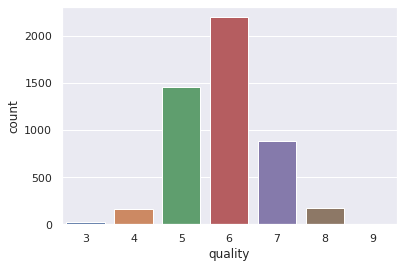

In [141]:
dataLink='https://drive.google.com/open?id=15VXMwTjcOPKUw9yt0SVX84kUH5fnVoaU'
fluff, id2 = dataLink.split('=')
print (id2)

downloaded = drive.CreateFile({'id':id2}) 
downloaded.GetContentFile('white_wine_dataset.csv') 

dataset= pd.read_csv('white_wine_dataset.csv')
# print(dataset.describe())

sns.countplot(x='quality', data=dataset)

Adding conditions to generate new labels for quality feature of wine Dataset

In [142]:
conditions = [
    (dataset['quality'] >= 8),
    (dataset['quality'] <= 5)
]
quality = [2, 0]
dataset['quality'] = np.select(conditions, quality, default=1)
dataset.quality.value_counts()

1    3078
0    1640
2     180
Name: quality, dtype: int64

Plotting Quality Data of Wine as three labels defined above

(4898, 11)
[6.30e+00 3.00e-01 3.40e-01 1.60e+00 4.90e-02 1.40e+01 1.32e+02 9.94e-01
 3.30e+00 4.90e-01 9.50e+00 1.00e+00]
[1 1 1 ... 1 1 1]


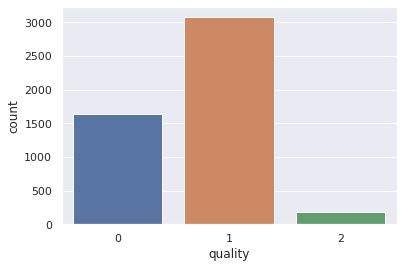

In [143]:
sns.countplot(x='quality', data=dataset)

X = dataset.drop(['quality'], axis=1)
X.head()
X = StandardScaler().fit_transform(X.iloc[:].values)
print(X.shape)
print(dataset.iloc[1,:].values)
Y = dataset['quality'].values
print(Y)

**Calculating Accuracy for Wine Data Using Labels**

**Script to generate BLOB Dataset**

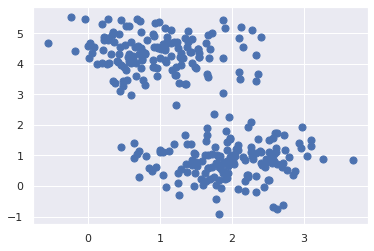

In [30]:
X, y_true = make_blobs(n_samples=300, centers=2,
                       cluster_std=0.6, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

**K-Means Clustering Script**

Text(0.5, 1.0, 'K Mean Clustering on White Wine Dataset')

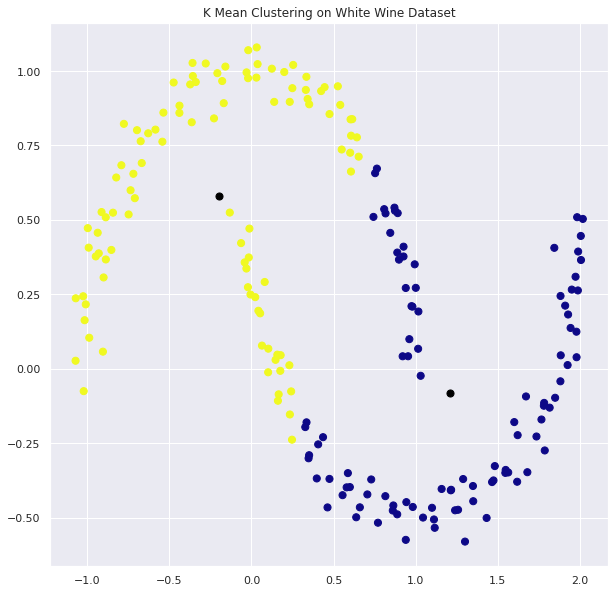

In [165]:
kmeans = KM(n_clusters=2)
kmeans.fit(X)
labels = kmeans.predict(X)
# print(labels.shape)
plt.figure(figsize=(10,10))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='plasma')
centers = kmeans.cluster_centers_

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=50, alpha=1)
plt.title('K Mean Clustering on White Wine Dataset')

**Code to find Accuracy of classified Data (White Wine Data)**

In [153]:
Y_pred = np.array(labels)
shape = Y.shape
Y_pred = Y_pred.reshape(shape)
number_of_equal_elements = np.sum(Y_pred==Y)
total_elements = len(Y)
percentage = 100 - number_of_equal_elements/total_elements*100
print("Acccuary: ",percentage)

Acccuary:  73.09105757452022


**Script to find value of K using Elbow Method**

In [0]:
from scipy.spatial.distance import cdist
SSE = []
K = range(1,10)
# print(len(X))
for k in K:
    kmeanModel = KM(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    SSE.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.figure(figsize=(16,16))
plt.plot(K, SSE, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method showing the optimal k')
plt.show()

**Generating moon shaped Dataset**

In [0]:
X, y_true = make_moons(200, noise=.05, random_state=0)
plt.scatter(X[:, 0], X[:, 1]);

**For DBSCAN with Noise. To generate dataset without noise remove add_noise()**

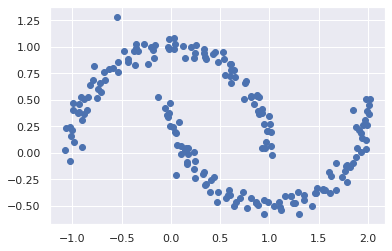

In [197]:
X, y_true = make_moons(200, noise=.05, random_state=0)
X = add_noise(X, X)
plt.scatter(X[:, 0], X[:, 1]);

**Function to Add Noise to the Dataset**




In [0]:
def add_noise(X,y_true, noise_level = 0.01):
    #The number of points we wish to make noisy
    amt_noise = int(noise_level*len(y_true))
    #Pick amt_noise points at random
    idx = np.random.choice(len(X), size = amt_noise)
    #Add random noise to these selected points
    noise = np.random.random((amt_noise, 2) ) -0.5
    X[idx,:] += noise
    return X 

**DBSCAN clustering Algorithm**

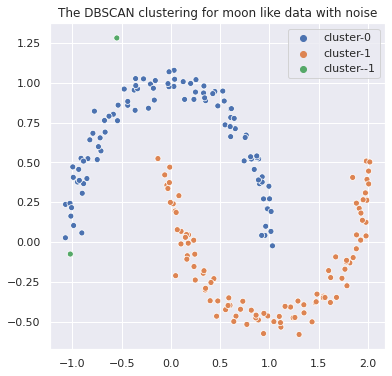

In [199]:
db = DBSCAN(eps=0.2, min_samples=10).fit(X)
labels = db.labels_
fig = plt.figure(figsize=(6, 6))
plt.title('The DBSCAN clustering for moon like data with noise')
sns.scatterplot(X[:,0], X[:,1], hue=["cluster-{}".format(x) for x in labels])